# Import necessary libraries

In [2]:
#Import matplotlib for plotting
import matplotlib.pyplot as plt

In [3]:
#Import numpy for matrix algebra
import numpy as np

In [33]:
#Import sklearn for machine learning models
from sklearn import datasets
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

In [5]:
#Imprt pandas for Dataset operations
import pandas as pd

In [6]:
#Imprt seaborn for heatmap
import seaborn as sns

In [7]:
# Import Scipy to apply Point Biserial Coorelation
from scipy.stats import pointbiserialr

# Load dataset and get a summary of the data for inspection

In [8]:
df = pd.read_csv('mobile_usage_analysis.csv')

In [9]:
#df.head()

In [10]:
#Get a summary of the data
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13589 entries, 0 to 13588
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   13589 non-null  int64  
 1   daily_screen_time     13589 non-null  float64
 2   app_sessions          13589 non-null  int64  
 3   notifications_number  13589 non-null  int64  
 4   night_usage           13589 non-null  float64
 5   productivity_hours    13589 non-null  float64
 6   stress_level          13589 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 743.3 KB
None
                age  daily_screen_time  app_sessions  notifications_number  \
count  13589.000000       13589.000000  13589.000000          13589.000000   
mean      33.055707           7.993782     30.037604             59.973287   
std       10.118145           2.940367      7.406585             13.766486   
min       15.000000           1.000000      8.000000            

# Explore Relationships and Correlations

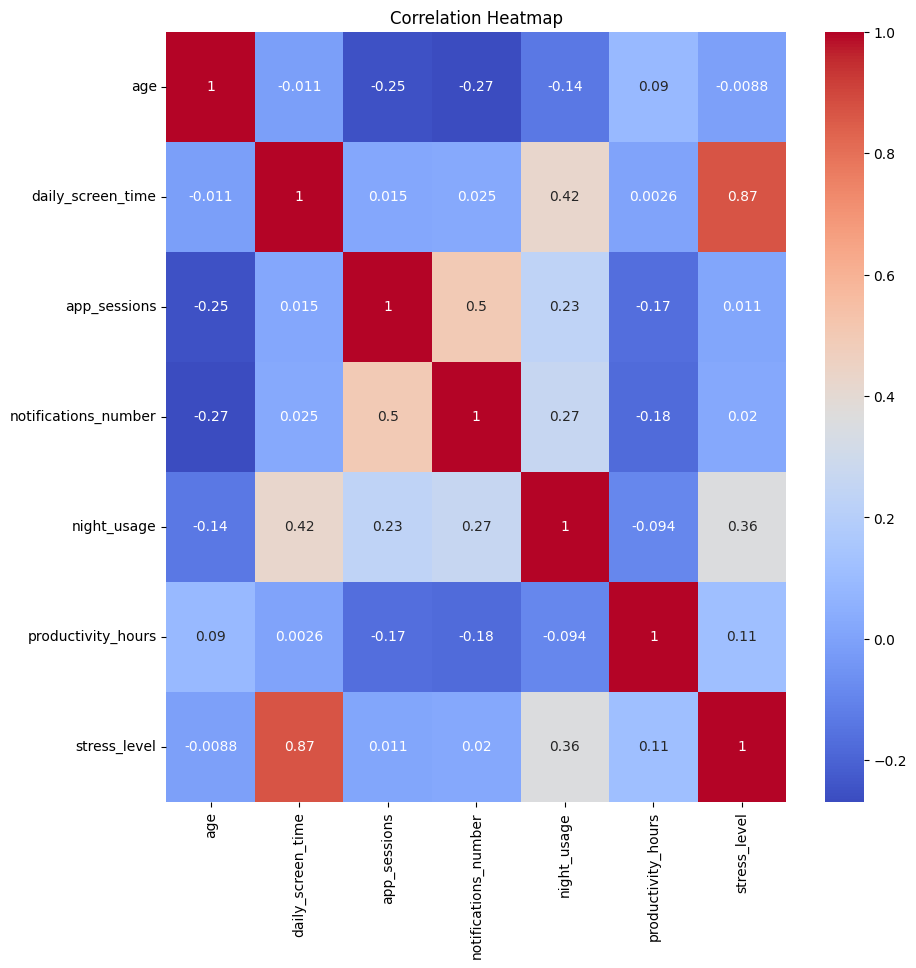

In [11]:
#Correlation matrix
corr = df.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

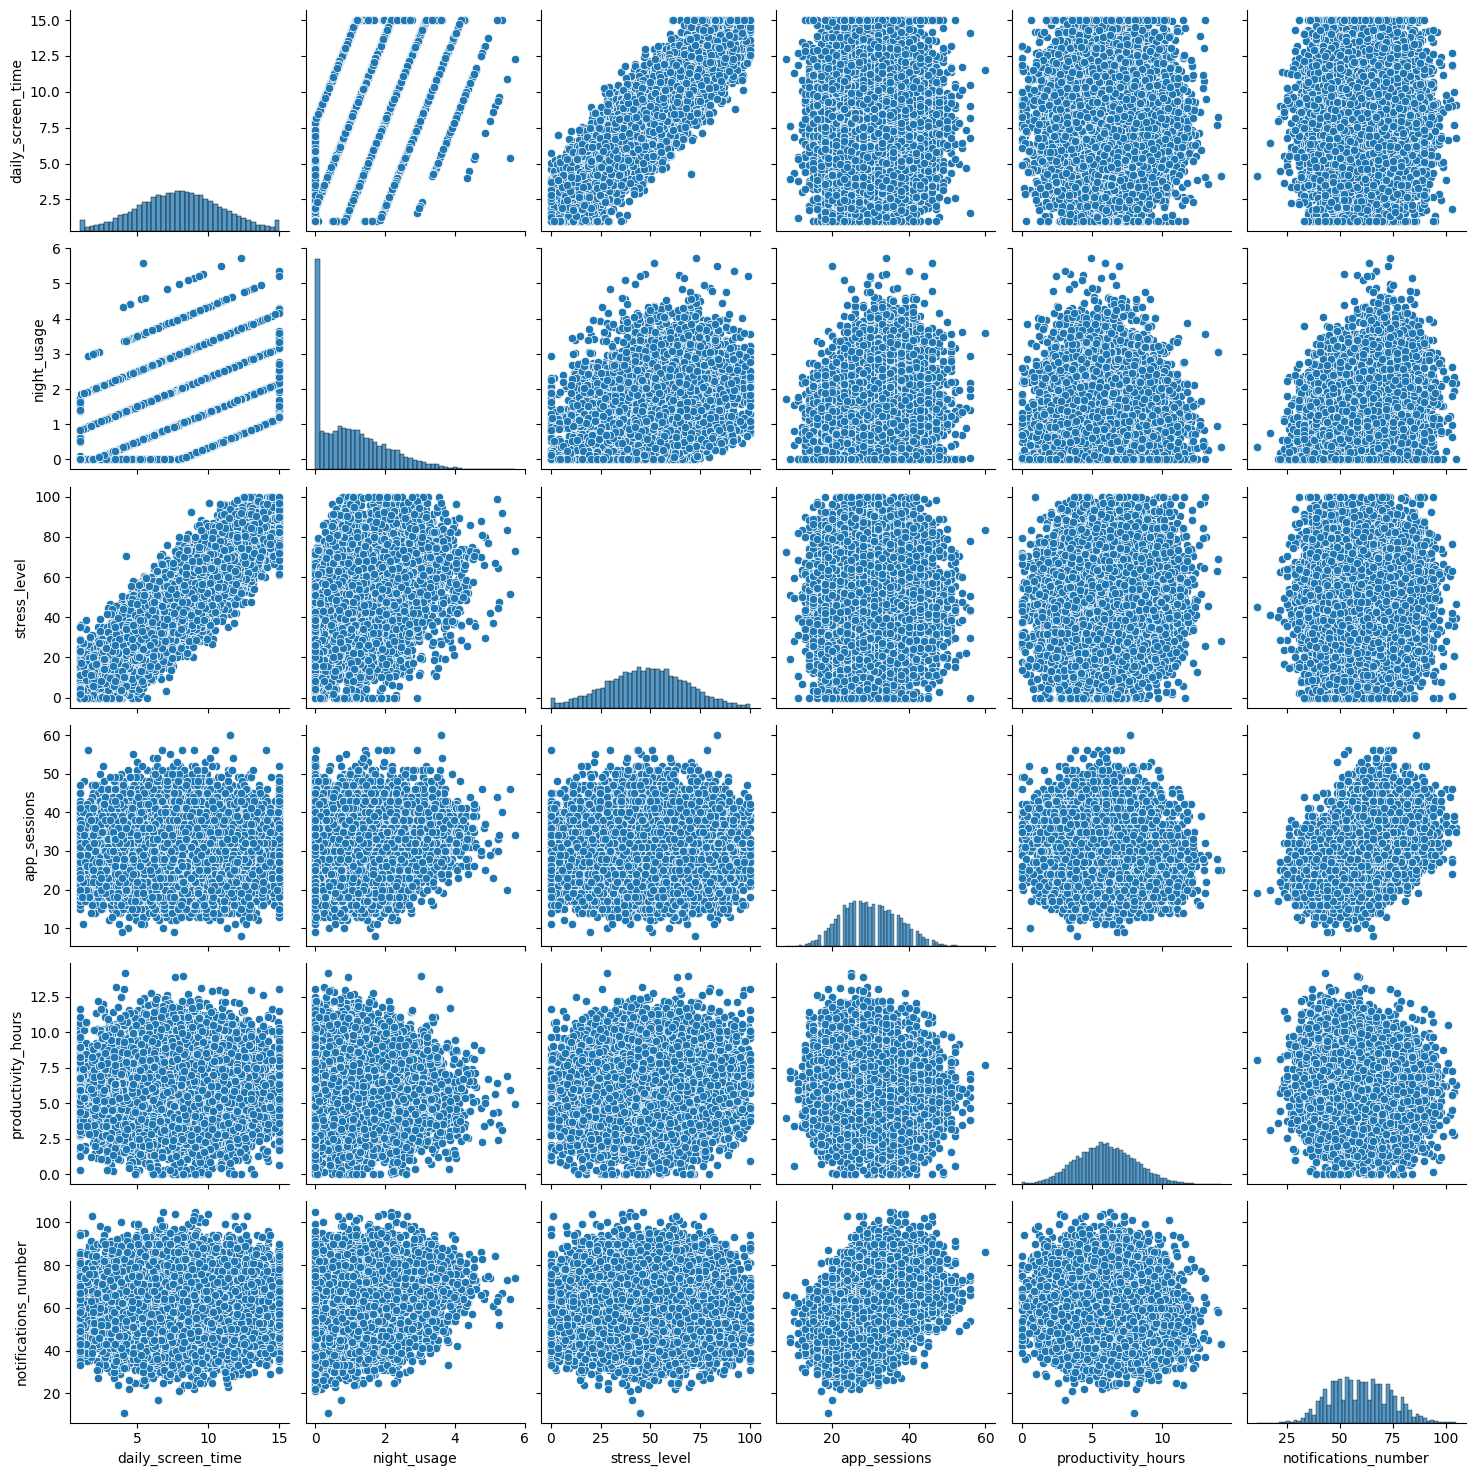

In [51]:
sns.pairplot(df, vars=['daily_screen_time', 'night_usage', 'stress_level', 'app_sessions', 'productivity_hours','notifications_number'])
plt.show()

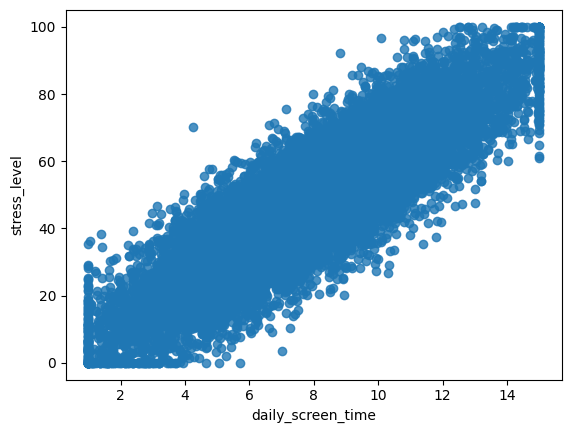

In [46]:
sns.regplot(x='daily_screen_time', y='stress_level', data=df)
plt.show()

# Prepare the Data (Splitting, Scalling)

Create models that studies the features that affect "stress_level"

In [12]:
# Select the features based on correlation heatmap
selected_features = ['daily_screen_time', 'night_usage']

X = df[selected_features]
y = df['stress_level']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply Regression Models (Multiple LR, Regularized: Lasso, Polynomial, Random Forest)

Linear Regression Model

In [13]:
# LR Model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predictions
lr_pred = lr.predict(X_test_scaled)

lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = lr_mse ** 0.5 # RMSE (manually)

Lasso Regression Model (Regularized Linear Model)

In [14]:
# Create a Lasso Regression model with alpha = 0.1
ls = Lasso(alpha=0.1)

# Fit the model on scaled data
ls.fit(X_train_scaled, y_train)

ls_predict = ls.predict(X_test_scaled)
ls_mse = mean_squared_error(y_test, ls_predict)
ls_rmse = ls_mse ** 0.5

Polynomial Model

In [38]:
# Create polynomial features
poly_features = PolynomialFeatures(degree=3)
x_poly_train = poly_features.fit_transform(X_train_scaled)
x_poly_test = poly_features.fit_transform(X_test_scaled)


# Fit polynomial regression model
poly = LinearRegression()
poly.fit(x_poly_train, y_train)

# Predict y values on test data using the model
y_pred_test = poly.predict(x_poly_test)

poly_test_mse = mean_squared_error(y_test, y_pred_test)
poly_test_rmse = poly_test_mse ** 0.5

# Predict y values on train data using the model
y_pred_train = poly.predict(x_poly_train)

poly_train_mse = mean_squared_error(y_train, y_pred_train)
poly_train_rmse = poly_train_mse ** 0.5

Randon Forest Regression

In [17]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  # Tree models don't need scaling

rf_pred = rf.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = rf_mse ** 0.5

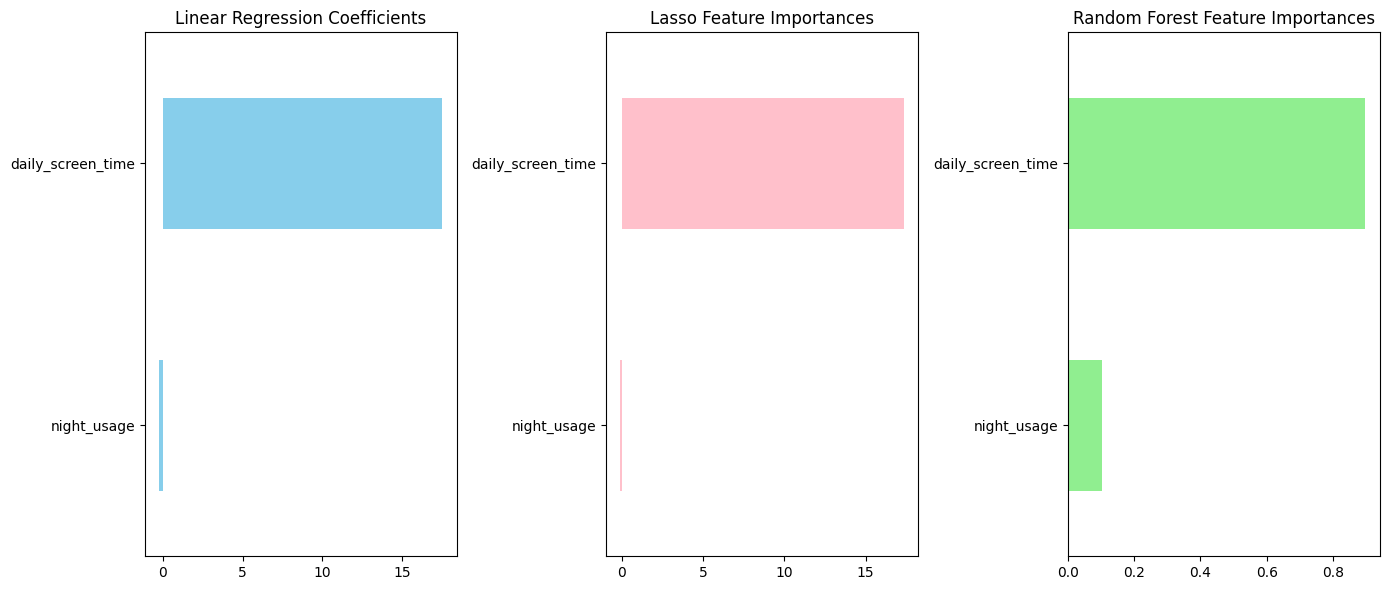

In [43]:
# Feature Importance - Linear Regression Coefficients
lr_coeffs = pd.Series(lr.coef_, index=selected_features).sort_values()

# Feature Importance - Lasso coefficients
lasso_coeffs = pd.Series(ls.coef_, index=selected_features).sort_values()

# Feature Importance - Random Forest
rf_importances = pd.Series(rf.feature_importances_, index=selected_features).sort_values()

# Plot comparison
fig, axes = plt.subplots(1, 3, figsize=(14, 6))
lr_coeffs.plot(kind='barh', ax=axes[0], color='skyblue')
axes[0].set_title('Linear Regression Coefficients')

lasso_coeffs.plot(kind='barh', ax=axes[1], color='pink')
axes[1].set_title('Lasso Feature Importances')

rf_importances.plot(kind='barh', ax=axes[2], color='lightgreen')
axes[2].set_title('Random Forest Feature Importances')

plt.tight_layout()
plt.show()


In [39]:
# Models Evaluation
# LR
print('Linear Regression R²:', r2_score(y_test, lr_pred))
print('Linear Regression MSE:', lr_mse)
print('Linear Regression RMSE:', lr_rmse)
print('\n')

# Lasso (alpha = 2)
print('Lasso Regression R²:', ls.score(X_test_scaled, y_test))
print('Lasso Regression MSE:', ls_mse)
print('Lasso Regression RMSE:', ls_rmse)
print('\n')

# Polynomial Training Performance
print('Polynomial Regression Training R²:', poly.score(x_poly_train, y_train))
print('Polynomial Regression Training MSE:', poly_train_mse)
print('Polynomial Regression Training RMSE:', poly_train_rmse)
print('\n')

# Polynomial Training Performance
print('Polynomial Regression Testing R²:', poly.score(x_poly_test, y_test))
print('Polynomial Regression Testing MSE:', poly_test_mse)
print('Polynomial Regression Testing RMSE:', poly_test_rmse)
print('\n')

# Randon Forest
print('Random Forest R²:', rf.score(X_test, y_test))
print('Random Forest Regression MSE:', rf_mse)
print('Random Forest Regression RMSE:', rf_rmse)

Linear Regression R²: 0.7573590356729519
Linear Regression MSE: 98.660183719092
Linear Regression RMSE: 9.93278328159293


Lasso Regression R²: 0.757460789708498
Lasso Regression MSE: 98.61880953535113
Lasso Regression RMSE: 9.9307003547258


Polynomial Regression Training R²: 0.7579783648207998
Polynomial Regression Training MSE: 97.17182570481862
Polynomial Regression Training RMSE: 9.857577070701431


Polynomial Regression Testing R²: 0.7573316393825695
Polynomial Regression Testing MSE: 98.67132331808696
Polynomial Regression Testing RMSE: 9.933344014886778


Random Forest R²: 0.661072397529568
Random Forest Regression MSE: 137.81127032669264
Random Forest Regression RMSE: 11.739304507793152
